In [13]:
from bs4 import BeautifulSoup
import requests
import json
import cv2
import numpy as np
import os

In [2]:
with open('Word_Segmentation/files/Dictionary.json') as d_file:
    dict_ = json.load(d_file)

In [68]:
url = 'https://pubchem.ncbi.nlm.nih.gov/compound/(3S)-2,3-dihydro-1,4-benzodioxine-3-carboxylic%20acid#section=2D-Structure&fullscreen=true'

with requests.Session() as req:
    resp = req.get(url)
    html = BeautifulSoup(resp.text, 'html.parser')

#print(html.prettify()[:2000])
img_tag = html.find('meta', {'property': "og:image"})
print(img_tag['content'])

https://pubchem.ncbi.nlm.nih.gov/image/imgsrv.fcgi?cid=687061&t=l


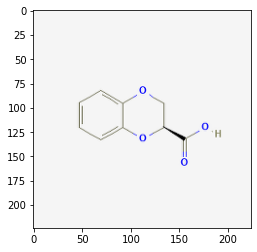

In [100]:
plt.imshow(image)

In [1]:
def add_img(path, compound):
    compound = compound.replace(' ', '%20')
    while True:
        try:
            with requests.Session() as html_req:
                html_resp = html_req.get('https://pubchem.ncbi.nlm.nih.gov/compound/compound#section=2D-Structure&fullscreen=true')
                html = BeautifulSoup(html_resp.text, 'html.parser')
            img_tag = html.find("meta", {"preperty": "og:url"})
            
            with requests.Session() as pic_req:
                pic_resp = pic_req.get(img_tag['content'])
                
                image = np.asarray(bytearray(pic_resp.content), dtype='uint8')
            image = cv2.imdecode(image, cv2.IMREAD_COLOR)
            image = cv2.resize(image, dsize=(224, 224), interpolation=cv2.INTER_LANCZOS4)

        except Exception as e:
            print(compound)
            print(e)
            continue
        break
        

In [4]:
folder_path = 'kme_datasets/'
for key, value in dict_.items():
    if not os.path.exists(folder_path+key):
        os.makedirs(folder_path+key)
    for compound in value:
        add_img(folder_path+key, compound)

methane
HTTPSConnectionPool(host='pubchem.ncbi.nlm.nih.gov', port=443): Max retries exceeded with url: /compound/compound (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f952468e280>: Failed to establish a new connection: [Errno 101] Network is unreachable'))
1.120854
1.054167
1.335043
1.100261
1.169349
hexane
HTTPSConnectionPool(host='pubchem.ncbi.nlm.nih.gov', port=443): Max retries exceeded with url: /compound/compound (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f952468e3d0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
3.915405
heptane
HTTPSConnectionPool(host='pubchem.ncbi.nlm.nih.gov', port=443): Max retries exceeded with url: /compound/compound (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f952468e580>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
2.262373
octane
HTTPS